<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Module_03_Detect_the_types_of_viruses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 384, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 384 (delta 26), reused 20 (delta 20), pack-reused 353
Receiving objects: 100% (384/384), 104.98 MiB | 17.55 MiB/s, done.
Resolving deltas: 100% (244/244), done.


In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle

data_path = '/content/drive/MyDrive/Data/M_Data'
classes = {'PSTV foliar symptoms': 0, 'Rugose mosaic symptom': 1}

# Read the data file names and corresponding labels
data = []
labels = []
for class_name, label in classes.items():
    class_path = os.path.join(data_path, class_name)
    file_names = os.listdir(class_path)
    for file_name in file_names:
        file_path = os.path.join(class_path, file_name)
        data.append(file_path)
        labels.append(label)

In [ ]:
# Split the data into training, validation, and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [ ]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)

    # Gamma correction
    gamma = 1.5
    image = np.power(image / 255.0, gamma)
    image = np.uint8(image * 255)

    # Smoothing
    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Resize image
    image = cv2.resize(image, (64, 64))
    return image

# Preprocess training images
train_images = [preprocess_image(image_path) for image_path in train_data]

# Preprocess validation images
val_images = [preprocess_image(image_path) for image_path in val_data]

# Preprocess test images
test_images = [preprocess_image(image_path) for image_path in test_data]

# Convert the images and labels to numpy arrays
train_images = np.array(train_images)
val_images = np.array(val_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

# Free up memory
del train_data, val_data, test_data, data, labels

In [ ]:
# Print the size of each set
print('Training set size:', len(train_data))
print('Validation set size:', len(val_data))
print('Testing set size:', len(test_data))

Training set size: 448
Validation set size: 112
Testing set size: 140


In [ ]:
def feature_extractor(dataset):
    image_dataset = []
    for img in dataset:
        features = []

        # FEATURE 1 - Pixel values
        pixel_values = img.reshape(-1)
        pixel_min = np.min(pixel_values)
        pixel_max = np.max(pixel_values)
        pixel_range = pixel_max - pixel_min
        pixel_values_normalized = (pixel_values - pixel_min) / pixel_range
        df['Pixel_Value'] = pixel_values_normalized

        # FEATURE 2 - Gabor filter responses
        num = 1
        kernels = []
        for theta in range(2):
            theta = theta / 4. * np.pi
            for sigma in (1, 3):
                lamda = np.pi / 4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)
                kernel = cv2.getGaborKernel((9, 9), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                kernels.append(kernel)
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img
                num += 1

        # FEATURE 3 - Sobel filter responses
        sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        sobelx = sobelx.reshape(-1)
        sobely = sobely.reshape(-1)
        df['Sobel_X'] = sobelx
        df['Sobel_Y'] = sobely

         # FEATURE 3 - Haralick texture features
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        haralick_features = mahotas.features.haralick(gray_img).mean(axis=0)
        features.extend(haralick_features)

        # FEATURE 4 - HSV Histogram
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hsv_hist = cv2.calcHist([hsv_img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        hsv_hist = cv2.normalize(hsv_hist, hsv_hist).flatten()
        features.extend(hsv_hist)

        # FEATURE 5 - Color Moments
        moments = cv2.moments(img)
        color_moments = [moments['m00'], moments['m10'], moments['m01'], moments['m20'], moments['m11'], moments['m02'], moments['m30'], moments['m21'], moments['m12'], moments['m03']]
        features.extend(color_moments)




        # Append features from the current image to the dataset
        image_dataset.append(features)def feature_extractor(dataset):
    image_dataset = []
    for img in dataset:
        features = []

        # FEATURE 1 - Pixel values
        pixel_values = img.reshape(-1)
        pixel_min = np.min(pixel_values)
        pixel_max = np.max(pixel_values)
        pixel_range = pixel_max - pixel_min
        pixel_values_normalized = (pixel_values - pixel_min) / pixel_range
        df['Pixel_Value'] = pixel_values_normalized

        # FEATURE 2 - Gabor filter responses
        num = 1
        kernels = []
        for theta in range(2):
            theta = theta / 4. * np.pi
            for sigma in (1, 3):
                lamda = np.pi / 4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)
                kernel = cv2.getGaborKernel((9, 9), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                kernels.append(kernel)
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img
                num += 1

        # FEATURE 3 - Sobel filter responses
        sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        sobelx = sobelx.reshape(-1)
        sobely = sobely.reshape(-1)
        df['Sobel_X'] = sobelx
        df['Sobel_Y'] = sobely

         # FEATURE 3 - Haralick texture features
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        haralick_features = mahotas.features.haralick(gray_img).mean(axis=0)
        features.extend(haralick_features)

        # FEATURE 4 - HSV Histogram
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hsv_hist = cv2.calcHist([hsv_img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        hsv_hist = cv2.normalize(hsv_hist, hsv_hist).flatten()
        features.extend(hsv_hist)

        # FEATURE 5 - Color Moments
        moments = cv2.moments(img)
        color_moments = [moments['m00'], moments['m10'], moments['m01'], moments['m20'], moments['m11'], moments['m02'], moments['m30'], moments['m21'], moments['m12'], moments['m03']]
        features.extend(color_moments)




        # Append features from the current image to the dataset
        image_dataset.append(features)

    return np.array(image_dataset)



# Extract features from training images
train_features = feature_extractor(train_images)

    return np.array(image_dataset)



# Extract features from training images
train_features = feature_extractor(train_images)

<ipython-input-11-77a3674421c8>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-11-77a3674421c8>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-11-77a3674421c8>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-11-77a3674421c8>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-11-77a3674421c8>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

In [18]:
# Free up memory
del train_images

import numpy as np

# Define the ELM model
class ELM:
    def __init__(self, num_hidden_nodes, activation='tanh'):
        self.num_hidden_nodes = num_hidden_nodes
        self.activation = activation
        self.weights_input_hidden = None
        self.bias_input_hidden = None

    def train(self, X, y):
        # Randomly initialize weights between input and hidden nodes
        num_input_nodes = X.shape[1]
        self.weights_input_hidden = np.random.randn(num_input_nodes, self.num_hidden_nodes)
        self.bias_input_hidden = np.random.randn(1, self.num_hidden_nodes)

        # Calculate hidden layer activations
        hidden_activations = self.calculate_activations(X, self.weights_input_hidden, self.bias_input_hidden)

        # Solve the system of linear equations to find the output weights
        self.weights_hidden_output = np.linalg.pinv(hidden_activations) @ y

    def predict(self, X):
        hidden_activations = self.calculate_activations(X, self.weights_input_hidden, self.bias_input_hidden)
        output_activations = hidden_activations @ self.weights_hidden_output
        return output_activations.squeeze()


    def calculate_activations(self, X, weights, bias):
        hidden_activations = X @ weights + bias

        # Apply activation function
        if self.activation == 'linear':
            hidden_activations = self.linear_activation(hidden_activations)
        elif self.activation == 'sigmoid':
            hidden_activations = self.sigmoid_activation(hidden_activations)
        elif self.activation == 'tanh':
            hidden_activations = self.tanh_activation(hidden_activations)
        elif self.activation == 'relu':
            hidden_activations = self.relu_activation(hidden_activations)

        return hidden_activations

    def linear_activation(self, x):
        return x

    def sigmoid_activation(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh_activation(self, x):
        return np.tanh(x)

    def relu_activation(self, x):
        return np.maximum(0, x)


# Create ELM instance and train the model
activation_functions = ['Linear', 'ReLU', 'Sigmoid', 'Tanh']
neurons = [128, 256, 512, 1024, 2048, 4096]
table_data = []

for activation in activation_functions:
    row_data = []
    for num_neurons in neurons:
        elm_model = ELM(num_hidden_nodes=num_neurons, activation=activation)
        elm_model.train(train_features, train_labels)

        # Extract features from validation images
        val_features = feature_extractor(val_images)

        # Predict labels for validation images
        val_predictions = elm_model.predict(val_features)

        # Evaluate the model
        val_accuracy = accuracy_score(val_labels, np.round(val_predictions))
        row_data.append(val_accuracy)

        # Extract features from test images
        test_features = feature_extractor(test_images)

        # Predict labels for test images
        test_predictions = elm_model.predict(test_features)

        # Reshape predictions to have two dimensions
        test_predictions = test_predictions.reshape(-1, 1)

        # Convert predictions to class labels
        test_predicted_labels = np.argmax(test_predictions, axis=1)

        # Convert the test labels to a numpy array
        test_labels = np.array(test_labels)

        # Evaluate the model on test data
        test_accuracy = accuracy_score(test_labels, test_predicted_labels)
        #print(f"Activation: {activation}, Neurons: {num_neurons}, Test Accuracy: {test_accuracy}")

    table_data.append(row_data)

# Create a DataFrame with the table data
table_df = pd.DataFrame(table_data, index=activation_functions, columns=neurons)

# Print the DataFrame
print(table_df)

best_activation = table_df.max().idxmax()
best_neurons = table_df[best_activation].idxmax()
print(f"The best configuration is Activation: {best_activation}, Neurons: {best_neurons}")




             128       256       512       1024      2048      4096
Linear   0.866071  0.821429  0.526786  0.910714  0.937500  0.955357
ReLU     0.857143  0.794643  0.544643  0.875000  0.937500  0.964286
Sigmoid  0.919643  0.794643  0.553571  0.955357  0.928571  0.973214
Tanh     0.785714  0.758929  0.482143  0.901786  0.964286  0.937500
The best configuration is Activation: 4096, Neurons: Sigmoid


In [ ]:
!pip uninstall mahotas -y
!pip install mahotas




Found existing installation: mahotas 1.4.13
Uninstalling mahotas-1.4.13:
  Successfully uninstalled mahotas-1.4.13
  Using cached mahotas-1.4.13-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.4 MB)


In [ ]:
from sklearn.metrics import classification_report

# Create ELM instance and train the model
activation_functions = ['Linear', 'ReLU', 'Sigmoid', 'Tanh']
neurons = [128, 256, 512, 1024, 2048, 4096]
table_data = []

for activation in activation_functions:
    row_data = []
    for num_neurons in neurons:
        elm_model = ELM(num_hidden_nodes=num_neurons, activation=activation)
        elm_model.train(train_features, train_labels)

        # Extract features from validation images
        val_features = feature_extractor(val_images)

        # Predict labels for validation images
        val_predictions = elm_model.predict(val_features)

        # Evaluate the model
        val_accuracy = accuracy_score(val_labels, np.round(val_predictions))
        row_data.append(val_accuracy)

        # Predict labels for test images
        test_predictions = elm_model.predict(test_features)

        # Reshape predictions to have two dimensions
        test_predictions = test_predictions.reshape(-1, 1)

        # Convert predictions to class labels
        test_predicted_labels = np.argmax(test_predictions, axis=1)


        # Convert the test labels to a numpy array
        test_labels = np.array(test_labels)

        # Evaluate the model on test data
        test_accuracy = accuracy_score(test_labels, test_predicted_labels)
        print(f"Activation: {activation}, Neurons: {num_neurons}")

        # Get the classification report
        report = classification_report(test_labels, test_predicted_labels)
        print(report)

    table_data.append(row_data)

# Create a DataFrame with the table data
table_df = pd.DataFrame(table_data, index=activation_functions, columns=neurons)

# Print the DataFrame
print(table_df)

best_activation = table_df.max().idxmax()
best_neurons = table_df[best_activation].idxmax()
print(f"The best configuration is Activation: {best_activation}, Neurons: {best_neurons}")


Activation: Linear, Neurons: 128
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Linear, Neurons: 256
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Linear, Neurons: 512
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Linear, Neurons: 1024
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Linear, Neurons: 2048
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Linear, Neurons: 4096
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: ReLU, Neurons: 128
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: ReLU, Neurons: 256
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: ReLU, Neurons: 512
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: ReLU, Neurons: 1024
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: ReLU, Neurons: 2048
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: ReLU, Neurons: 4096
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Sigmoid, Neurons: 128
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Sigmoid, Neurons: 256
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Sigmoid, Neurons: 512
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Sigmoid, Neurons: 1024
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Sigmoid, Neurons: 2048
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Sigmoid, Neurons: 4096
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Tanh, Neurons: 128
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Tanh, Neurons: 256
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Tanh, Neurons: 512
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Tanh, Neurons: 1024
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Tanh, Neurons: 2048
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: Tanh, Neurons: 4096
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        88
           1       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140

             128       256       512       1024      2048      4096
Linear   0.848214  0.830357  0.544643  0.875000  0.928571  0.964286
ReLU     0.848214  0.857143  0.651786  0.857143  0.928571  0.946429
Sigmoid  0.883929  0.821429  0.526786  0.919643  0.928571  0.955357
Tanh     0.794643  0.812500  0.517857  0.857143  0.928571  0.946429
The best configuration is Activation: 4096, Neurons: Linear


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
 # Create ELM instance and train the model
activation_functions = ['Linear', 'ReLU', 'Sigmoid', 'Tanh']
neurons = [128, 256, 512, 1024, 2048, 4096]
table_data = []

for activation in activation_functions:
    row_data = []
    for num_neurons in neurons:
        elm_model = ELM(num_hidden_nodes=num_neurons, activation=activation)
        elm_model.train(train_features, train_labels)

        # Extract features from validation images
        val_features = feature_extractor(val_images)

        # Predict labels for validation images
        val_predictions = elm_model.predict(val_features)

        # Evaluate the model
        val_accuracy = accuracy_score(val_labels, np.round(val_predictions))

        # Extract features from test images
        test_features = feature_extractor(test_images)

        # Predict labels for test images
        test_predictions = elm_model.predict(test_features)

        # Convert predictions to class labels
        test_predicted_labels = np.round(test_predictions)

        # Convert the test labels to a numpy array
        test_labels = np.array(test_labels)

        # Evaluate the model on test data
        test_accuracy = accuracy_score(test_labels, test_predicted_labels)

        # Append the data to the table
        row_data.append([activation, num_neurons, val_accuracy, test_accuracy])

    table_data.extend(row_data)

# Create a DataFrame with the table data
table_df = pd.DataFrame(table_data, columns=['Activation', 'Neurons', 'Validation Accuracy', 'Test Accuracy'])

# Print the DataFrame
print(table_df)


   Activation  Neurons  Validation Accuracy  Test Accuracy
0      Linear      128             0.892857       0.857143
1      Linear      256             0.857143       0.835714
2      Linear      512             0.500000       0.628571
3      Linear     1024             0.892857       0.907143
4      Linear     2048             0.919643       0.964286
5      Linear     4096             0.919643       0.971429
6        ReLU      128             0.812500       0.907143
7        ReLU      256             0.830357       0.842857
8        ReLU      512             0.455357       0.464286
9        ReLU     1024             0.892857       0.928571
10       ReLU     2048             0.937500       0.957143
11       ReLU     4096             0.955357       0.971429
12    Sigmoid      128             0.901786       0.885714
13    Sigmoid      256             0.767857       0.828571
14    Sigmoid      512             0.491071       0.614286
15    Sigmoid     1024             0.839286       0.9071

In [ ]:
best_activation = table_df.max().idxmax()
best_neurons = table_df[best_activation].idxmax()
print(f"The best configuration is Activation: {best_activation}, Neurons: {best_neurons}")


The best configuration is Activation: 4096, Neurons: Linear


In [ ]:
best_accuracy = table_df.max().max()
best_activation = table_df.stack().idxmax()[0]
best_neurons = table_df.stack().idxmax()[1]

print(f"The best configuration is Activation: {best_activation}, Neurons: {best_neurons}")
print(f"Accuracy Score: {best_accuracy}")


The best configuration is Activation: Linear, Neurons: 4096
Accuracy Score: 0.9642857142857143


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the ELM model with the best configuration
elm_model = ELM(num_hidden_nodes=best_neurons, activation=best_activation)
elm_model.train(train_features, train_labels)

# Extract features from test images
test_features = feature_extractor(test_images)

# Predict labels for test images
test_predictions = elm_model.predict(test_features)

# Calculate precision, recall, and F1-score
precision = precision_score(test_labels, np.round(test_predictions))
recall = recall_score(test_labels, np.round(test_predictions))
f1 = f1_score(test_labels, np.round(test_predictions))

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Precision: 0.94
Recall: 0.90
F1-score: 0.92


## k-nearest neighbors algorithm

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
KNN_model = KNeighborsClassifier()

# Convert labels back to original class names
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)

# Perform grid search with cross-validation
grid_search = GridSearchCV(KNN_model, param_grid, cv=5)
grid_search.fit(image_features, train_labels_encoded)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train KNN classifier with the best hyperparameters
best_KNN_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_KNN_model.fit(image_features, train_labels_encoded)

# Predict on test data using the best KNN model
test_predictions_knn = best_KNN_model.predict(test_features)

# Convert labels back to original class names
test_predictions_knn = le.inverse_transform(test_predictions_knn)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions_knn)
print("Accuracy:", accuracy)


Best Hyperparameters: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.7785714285714286


In [ ]:
# Print overall accuracy for KNN
test_accuracy_knn = accuracy_score(test_labels, test_predictions_knn)
print("KNN Test Accuracy:", test_accuracy_knn)

# Print precision, recall, and F1 score for KNN
precision_knn = precision_score(test_labels, test_predictions_knn, average='weighted')
recall_knn = recall_score(test_labels, test_predictions_knn, average='weighted')
f1_knn = f1_score(test_labels, test_predictions_knn, average='weighted')
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1 Score:", f1_knn)

KNN Test Accuracy: 0.7785714285714286
KNN Precision: 0.851780109407228
KNN Recall: 0.7785714285714286
KNN F1 Score: 0.7808705437062043


## Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
RF_model = RandomForestClassifier(random_state=42)

# Convert labels back to original class names
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)

# Perform grid search with cross-validation
grid_search = GridSearchCV(RF_model, param_grid, cv=5)
grid_search.fit(image_features, train_labels_encoded)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train Random Forest classifier with the best hyperparameters
best_RF_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_RF_model.fit(image_features, train_labels_encoded)

# Predict on test data using the best Random Forest model
test_predictions_rf = best_RF_model.predict(test_features)

# Convert labels back to original class names
test_predictions_rf = le.inverse_transform(test_predictions_rf)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions_rf)
print("Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.9142857142857143


In [ ]:
# Print overall accuracy for Random Forest
test_accuracy_rf = accuracy_score(test_labels, test_predictions_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)

# Print precision, recall, and F1 score for Random Forest
precision_rf = precision_score(test_labels, test_predictions_rf, average='weighted')
recall_rf = recall_score(test_labels, test_predictions_rf, average='weighted')
f1_rf = f1_score(test_labels, test_predictions_rf, average='weighted')
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)


Random Forest Test Accuracy: 0.9142857142857143
Random Forest Precision: 0.9139682539682541
Random Forest Recall: 0.9142857142857143
Random Forest F1 Score: 0.9139269190822398


Define the hyperparameters and their possible values (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Reshape for SVM training
n_samples = train_images.shape[0]
image_features = np.array(image_features)
image_features = np.reshape(image_features, (n_samples, -1))

# Define the hyperparameters and their possible values
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1.0, 10.0],
    'gamma': [0.1, 1.0, 10.0]
}

# Create an SVM model
svm_model = SVC()

# Perform grid search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(image_features, train_labels)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)



Best Hyperparameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


In [ ]:

# Retrain the model using the best hyperparameters
best_svm_model = SVC(**grid_search.best_params_)
best_svm_model.fit(image_features, train_labels)

# Reshape the test dataset
n_test_samples = test_images.shape[0]
test_features = np.array(test_images)
test_features = np.reshape(test_features, (n_test_samples, -1))

# Evaluate the final model on the test dataset
accuracy = best_svm_model.score(test_features, test_labels)
print("Accuracy on test set: ", accuracy)

In [ ]:
# Print overall accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9357142857142857


In [ ]:
# Print precision, recall, and F1 score
precision = precision_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')
print("Svm Precision:", precision)
print("svm Recall:", recall)
print("svm F1 Score:", f1)

Svm Precision: 0.9418766627806174
svm Recall: 0.9357142857142857
svm F1 Score: 0.9364099517945671


Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree classifier
DT_model = DecisionTreeClassifier(random_state=42)

# Convert labels back to original class names
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)

# Perform grid search with cross-validation
grid_search = GridSearchCV(DT_model, param_grid, cv=5)
grid_search.fit(image_features, train_labels_encoded)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train Decision Tree classifier with the best hyperparameters
best_DT_model = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_DT_model.fit(image_features, train_labels_encoded)

# Predict on test data using the best Decision Tree model
test_predictions_dt = best_DT_model.predict(test_features)

# Convert labels back to original class names
test_predictions_dt = le.inverse_transform(test_predictions_dt)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions_dt)
print("Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.8071428571428572


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes classifier
NB_model = GaussianNB()
NB_model.fit(image_features, train_labels)

# Predict on test data using Naive Bayes
test_predictions_nb = NB_model.predict(test_features)

# Convert labels back to original class names
test_predictions_nb = le.inverse_transform(test_predictions_nb)

# Print overall accuracy for Naive Bayes
test_accuracy_nb = accuracy_score(test_labels, test_predictions_nb)
print("Naive Bayes Test Accuracy:", test_accuracy_nb)

# Print precision, recall, and F1 score for Naive Bayes
precision_nb = precision_score(test_labels, test_predictions_nb, average='weighted')
recall_nb = recall_score(test_labels, test_predictions_nb, average='weighted')
f1_nb = f1_score(test_labels, test_predictions_nb, average='weighted')
print("Naive Bayes Precision:", precision_nb)
print("Naive Bayes Recall:", recall_nb)
print("Naive Bayes F1 Score:", f1_nb)


Naive Bayes Test Accuracy: 0.6642857142857143
Naive Bayes Precision: 0.7050442503724041
Naive Bayes Recall: 0.6642857142857143
Naive Bayes F1 Score: 0.6697437788018433


In [ ]:
# Print precision, recall, and F1 score for Decision Tree
precision_dt = precision_score(test_labels, test_predictions_dt, average='weighted')
recall_dt = recall_score(test_labels, test_predictions_dt, average='weighted')
f1_dt = f1_score(test_labels, test_predictions_dt, average='weighted')
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1 Score:", f1_dt)


Decision Tree Precision: 0.8153767972977012
Decision Tree Recall: 0.8071428571428572
Decision Tree F1 Score: 0.8092298553837015


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for SVM
svm_report = classification_report(test_labels, test_predictions)
print("ELM Classification Report:")
print(svm_report)

# Generate classification report for Gradient Boosting
SVM_report = classification_report(test_labels, test_predictions_xgb)
print("SVM Classification Report:")
print(xgb_report)

# Generate classification report for KNN
knn_report = classification_report(test_labels, test_predictions_knn)
print("KNN Classification Report:")
print(knn_report)

# Generate classification report for Random Forest
rf_report = classification_report(test_labels, test_predictions_rf)
print("Random Forest Classification Report:")
print(rf_report)

# Generate classification report for Decision Tree
dt_report = classification_report(test_labels, test_predictions_dt)
print("Decision Tree Classification Report:")
print(dt_report)





ELM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        88
           1       0.86      0.98      0.92        52

    accuracy                           0.94       140
   macro avg       0.93      0.94      0.93       140
weighted avg       0.94      0.94      0.94       140

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        88
           1       0.84      0.90      0.87        52

    accuracy                           0.90       140
   macro avg       0.89      0.90      0.89       140
weighted avg       0.90      0.90      0.90       140

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        88
           1       0.54      1.00      0.70        52

    accuracy                           0.69       140
   macro avg       0.77      0.75      0.68    

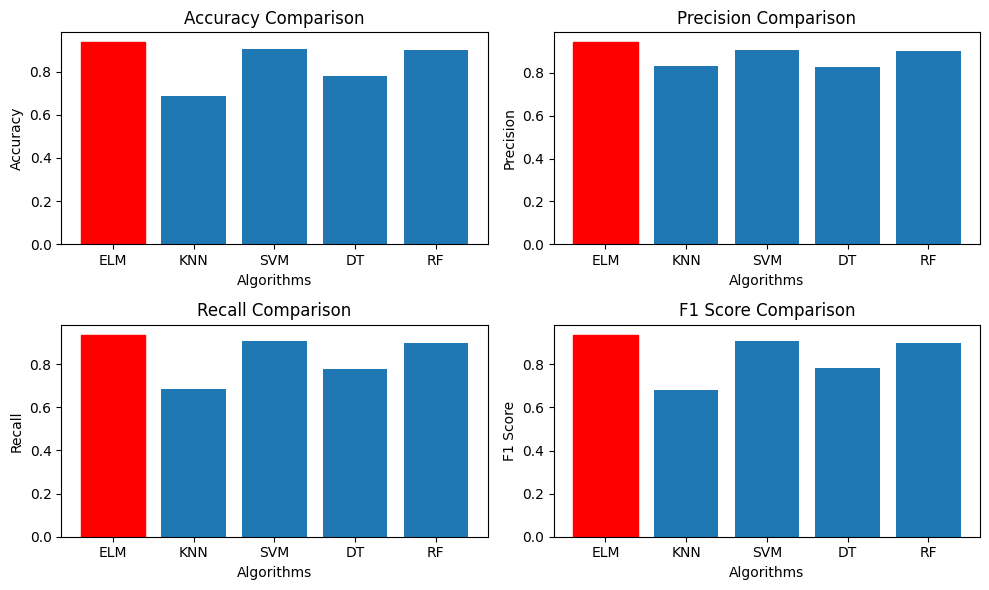

In [ ]:
import matplotlib.pyplot as plt

# List of algorithm names
algorithms = ['ELM', 'KNN', 'SVM', 'DT', 'RF']

# List of accuracy scores
accuracy_scores = [test_accuracy, test_accuracy_knn, test_accuracy_rf, test_accuracy_dt, test_accuracy_xgb]

# List of precision scores
precision_scores = [precision, precision_knn, precision_rf, precision_dt, precision_xgb]

# List of recall scores
recall_scores = [recall, recall_knn, recall_rf, recall_dt, recall_xgb]

# List of F1 scores
f1_scores = [f1, f1_knn, f1_rf, f1_dt, f1_xgb]

# Find the index of the algorithm with the highest score in each metric
highest_accuracy_index = accuracy_scores.index(max(accuracy_scores))
highest_precision_index = precision_scores.index(max(precision_scores))
highest_recall_index = recall_scores.index(max(recall_scores))
highest_f1_index = f1_scores.index(max(f1_scores))

# Plotting the scores with highlighting the highest ones
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(2, 2, 1)
bars = plt.bar(algorithms, accuracy_scores)
bars[highest_accuracy_index].set_color('red')
plt.title('Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

# Precision plot
plt.subplot(2, 2, 2)
bars = plt.bar(algorithms, precision_scores)
bars[highest_precision_index].set_color('red')
plt.title('Precision Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Precision')

# Recall plot
plt.subplot(2, 2, 3)
bars = plt.bar(algorithms, recall_scores)
bars[highest_recall_index].set_color('red')
plt.title('Recall Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Recall')

# F1 Score plot
plt.subplot(2, 2, 4)
bars = plt.bar(algorithms, f1_scores)
bars[highest_f1_index].set_color('red')
plt.title('F1 Score Comparison')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()



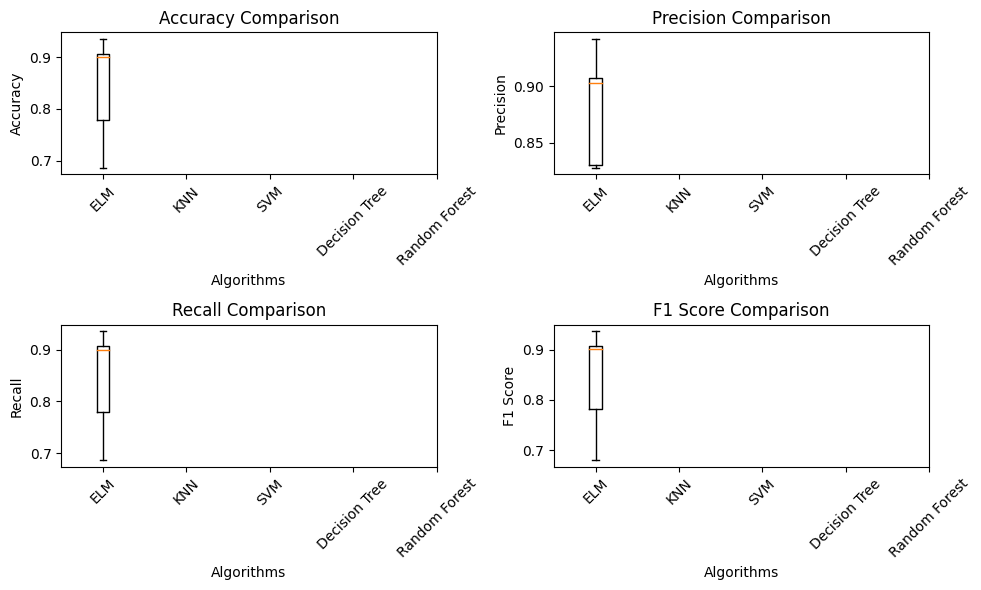

In [ ]:
# Create a list of evaluation metric scores for each algorithm
accuracy_scores = [test_accuracy, test_accuracy_knn, test_accuracy_rf, test_accuracy_dt, test_accuracy_xgb]
precision_scores = [precision, precision_knn, precision_rf, precision_dt, precision_xgb]
recall_scores = [recall, recall_knn, recall_rf, recall_dt, recall_xgb]
f1_scores = [f1, f1_knn, f1_rf, f1_dt, f1_xgb]

# Create a dictionary to store the scores for each algorithm
algorithm_scores = {
    'ELM': accuracy_scores[0],
    'KNN': accuracy_scores[1],
    'SVM': accuracy_scores[2],
    'Decision Tree': accuracy_scores[3],
    'Random Forest': accuracy_scores[4]
}

# Create a list of algorithm names
algorithm_names = list(algorithm_scores.keys())

# Create a list of score lists for box plot
score_lists = [accuracy_scores, precision_scores, recall_scores, f1_scores]

# Create a list of metric names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting the box plots
plt.figure(figsize=(10, 6))

for i in range(len(score_lists)):
    plt.subplot(2, 2, i+1)
    plt.boxplot(score_lists[i])
    plt.title(metric_names[i] + ' Comparison')
    plt.xlabel('Algorithms')
    plt.ylabel(metric_names[i])
    plt.xticks(range(1, len(algorithm_names) + 1), algorithm_names, rotation=45)

plt.tight_layout()
plt.show()


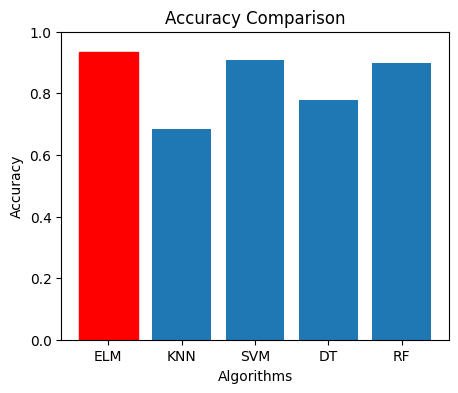

In [ ]:
# Create a list of accuracy scores for each algorithm
accuracy_scores = [test_accuracy, test_accuracy_knn, test_accuracy_rf, test_accuracy_dt, test_accuracy_xgb]

# Create a list of algorithm names
algorithm_names = ['ELM', 'KNN', 'SVM', 'DT','RF']

# Find the index of the algorithm with the highest accuracy score
highest_accuracy_index = accuracy_scores.index(max(accuracy_scores))

# Plotting the accuracy scores with highlighting the highest one
plt.figure(figsize=(5, 4))
bars = plt.bar(algorithm_names, accuracy_scores)
bars[highest_accuracy_index].set_color('red')  # Highlight the highest accuracy bar
plt.title('Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Reshape for SVM training
n_samples = train_images.shape[0]
image_features = np.array(image_features)
image_features = np.reshape(image_features, (n_samples, -1))

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}

# Create an instance of the SVM classifier
svm_model = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=SVM_model, param_grid=param_grid, scoring='accuracy')

# Fit the model on training data with grid search
grid_search.fit(image_features, train_labels)

# Retrieve the best hyperparameters and test accuracy
best_params = grid_search.best_params_
test_accuracy = grid_search.best_score_

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Test Accuracy: 0.8503620474406992


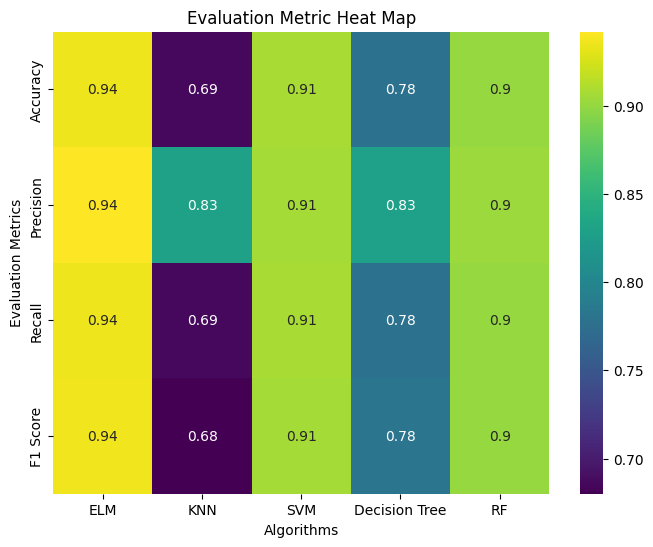

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D array of metric scores
metric_scores = np.array([accuracy_scores, precision_scores, recall_scores, f1_scores])

# Define the algorithm names
algorithm_names = ['ELM', 'KNN', 'SVM', 'Decision Tree', 'RF']

# Create a heat map using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(metric_scores, annot=True, cmap='viridis', xticklabels=algorithm_names, yticklabels=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Evaluation Metrics')
plt.title('Evaluation Metric Heat Map')

# Show the plot
plt.show()


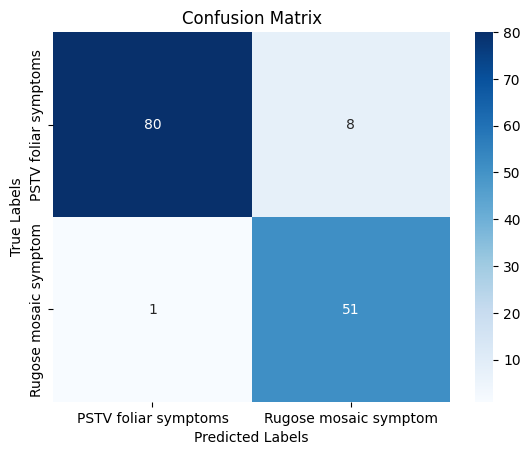

In [ ]:
# Print confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)
class_names = list(classes.keys())
fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

<ipython-input-11-543668ae4b83>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


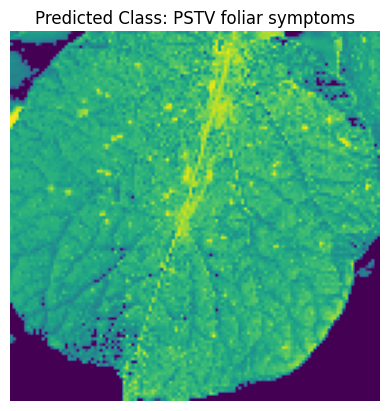

<ipython-input-11-543668ae4b83>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


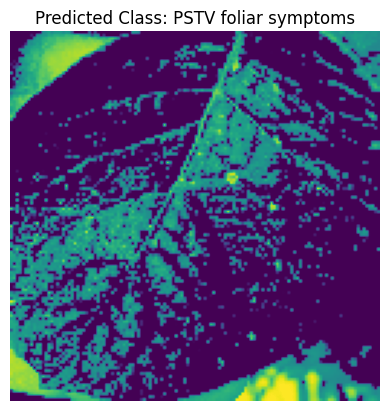

<ipython-input-11-543668ae4b83>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


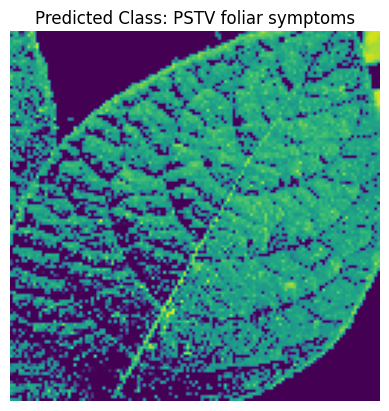

<ipython-input-11-543668ae4b83>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


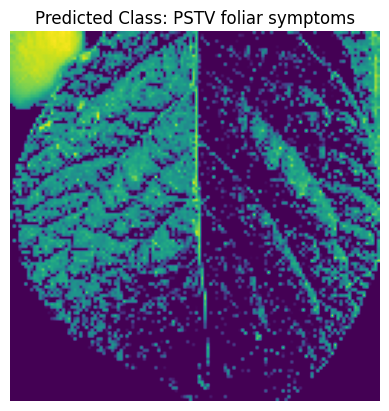

<ipython-input-11-543668ae4b83>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


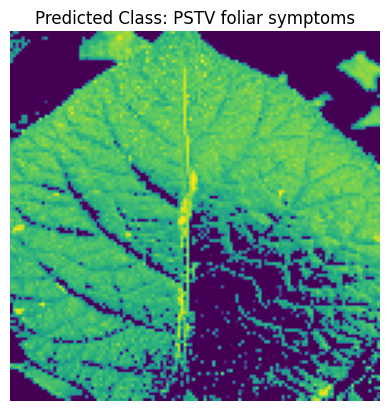

<ipython-input-11-543668ae4b83>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


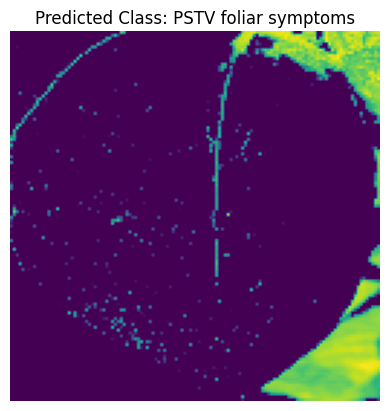

<ipython-input-11-543668ae4b83>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


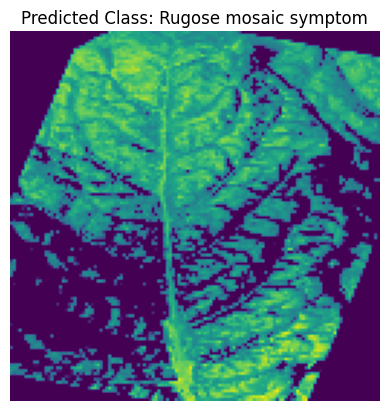

<ipython-input-11-543668ae4b83>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


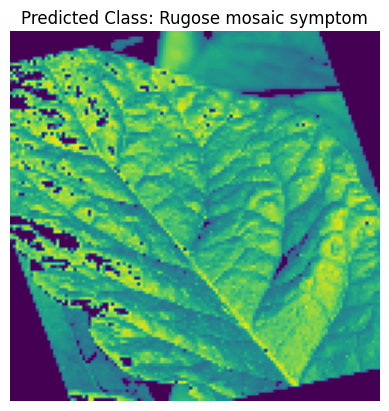

<ipython-input-11-543668ae4b83>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


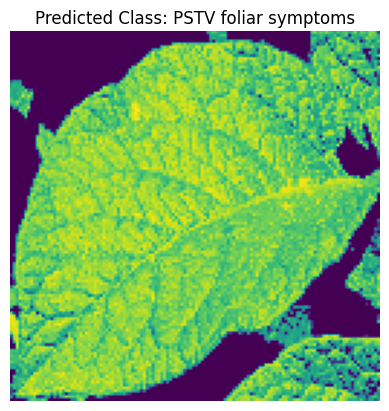

<ipython-input-11-543668ae4b83>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


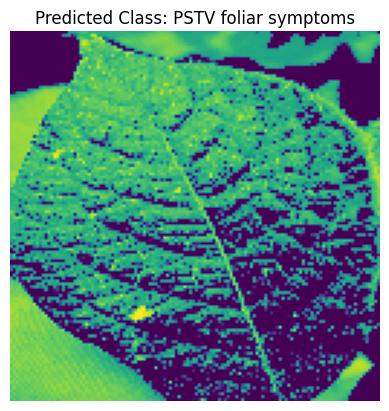

In [ ]:
# Import the necessary libraries
import random

# Select 10 random indices from the test dataset
random_indices = random.sample(range(len(test_data)), 10)

# Iterate over the random indices and make predictions
for index in random_indices:
    # Get the image path and preprocess the image
    image_path = test_data[index]
    preprocessed_image = preprocess_image(image_path)

    # Extract features and reshape for prediction
    input_img = np.expand_dims(preprocessed_image, axis=0)
    input_img_features = feature_extractor(input_img)
    input_img_features = np.expand_dims(input_img_features, axis=0)
    input_img_for_EML = np.reshape(input_img_features, (input_img.shape[0], -1))

    # Make the prediction
    img_prediction = elm_model.predict(input_img_for_EML)
    img_prediction = le.inverse_transform(img_prediction)

    # Convert the class label to class name
    prediction_class_name = class_names[img_prediction[0]]

    # Display the image and predicted class
    plt.imshow(preprocessed_image, cmap='viridis')
    plt.axis('off')
    plt.title("Predicted Class: " + prediction_class_name)
    plt.show()